In [1]:
#Important relevant libraries

import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import scipy as sp


In [2]:
#Routines to transform MIRI cubes into ring maps of brightness versus radius and wavelength
#Also routines to extract reference spectra of Saturn

def saturnmap(file,backfile):
    nr=81
    radi=np.linspace(70e3,150e3, num=nr)
    radi=np.array(radi)
    dr=radi[1]-radi[0]
    image_file = get_pkg_data_filename(file)
    hdul = fits.open(image_file)
    qubx = fits.getdata(image_file, ext=1).astype(float)
    rad = fits.getdata(image_file, ext=17).astype(float)
    image_file = get_pkg_data_filename(backfile)
    hdul = fits.open(image_file)
    qubb = fits.getdata(image_file, ext=1).astype(float)
    qub=qubx-qubb
    hdr=hdul[1].header
    nwave=hdr['NAXIS3']
    wave0=hdr['CRVAL3']
    dwave=hdr['CDELT3']
    waves=np.linspace(wave0,wave0+nwave*dwave,nwave)
    imshape=np.shape(qub)
    ns=imshape[0]
    nx=imshape[1]
    ny=imshape[2]
    #print(ns,nx,ny)
    specs=np.zeros([ns,nr])
    radx=rad[3:nx-3,3:ny-3]
    for i in range(0,ns):
        datx=qub[i,3:nx-3,3:ny-3]
        for j in range(0,nr):
            daty=datx[np.abs(radx-radi[j]) < dr/2]
            specs[i,j]=np.mean(daty)       
    return specs,radi, waves

def saturnmap2(files,backfile):
    spec1,radi,waves=saturnmap(files[0],backfile)
    spec2,rad2,waves=saturnmap(files[1],backfile)
    spec3,rad3,waves=saturnmap(files[2],backfile)
    spec4,rad4,waves=saturnmap(files[3],backfile)
    imshape=np.shape(spec1)
    nr=imshape[1]
    ns=imshape[0]
    specs=np.zeros([4,ns,nr])
    specs[0,0:ns,0:nr]=spec1
    specs[1,0:ns,0:nr]=spec2
    specs[2,0:ns,0:nr]=spec3
    specs[3,0:ns,0:nr]=spec4
    spec=np.nanmean(specs,axis=0)
    return spec,radi, waves

def saturnspec(file,backfile):
    image_file = get_pkg_data_filename(file)
    hdul = fits.open(image_file)
    qubx = fits.getdata(image_file, ext=1).astype(float)
    image_file = get_pkg_data_filename(backfile)
    hdul = fits.open(image_file)
    qubb = fits.getdata(image_file, ext=1).astype(float)
    qub=qubx-qubb
    imshape=np.shape(qub)
    ns=imshape[0]
    nx=imshape[1]
    ny=imshape[2]
    #print(ns,nx,ny)
    spec=np.zeros(ns)
    for i in range(0,ns):
        spec[i]=np.nanmean(qub[i,10:nx-10,10:ny-10])      
    return spec

def saturnspec2(files,backfile):
    spec1=saturnspec(files[0],backfile)
    spec2=saturnspec(files[1],backfile)
    spec3=saturnspec(files[2],backfile)
    spec4=saturnspec(files[3],backfile)
    imshape=np.shape(spec1)
    ns=imshape[0]
    specs=np.zeros([4,ns])
    specs[0,0:ns]=spec1
    specs[1,0:ns]=spec2
    specs[2,0:ns]=spec3
    specs[3,0:ns]=spec4
    spec=np.nanmean(specs,axis=0)
    return spec

In [3]:
#Generate maps for the various wavelength channels

spec1s,rad1, wave1s,=saturnmap2(["jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d1_fringe/Level3_ch1-short_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d2_fringe/Level3_ch1-short_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d3_fringe/Level3_ch1-short_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d4_fringe/Level3_ch1-short_s3d_nav.fits"],
    "jw01247/2023-08-22_reduction/SATURN-OFFSET/stage5_despike/d1_fringe/Level3_ch1-short_s3d_nav.fits")
spec1m,rad1, wave1m,=saturnmap2(["jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d1_fringe/Level3_ch1-medium_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d2_fringe/Level3_ch1-medium_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d3_fringe/Level3_ch1-medium_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d4_fringe/Level3_ch1-medium_s3d_nav.fits"],
    "jw01247/2023-08-22_reduction/SATURN-OFFSET/stage5_despike/d1_fringe/Level3_ch1-medium_s3d_nav.fits")
spec1l,rad1, wave1l,=saturnmap2(["jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d1_fringe/Level3_ch1-long_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d2_fringe/Level3_ch1-long_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d3_fringe/Level3_ch1-long_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d4_fringe/Level3_ch1-long_s3d_nav.fits"],
    "jw01247/2023-08-22_reduction/SATURN-OFFSET/stage5_despike/d1_fringe/Level3_ch1-long_s3d_nav.fits")

/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Applications/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/1751962429.py:49: RuntimeWarning: Mean of empty slice
  spec=np.nanmean(specs,axis=0)


In [4]:
spec2s,rad1, wave2s,=saturnmap2(["jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d1_fringe/Level3_ch2-short_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d2_fringe/Level3_ch2-short_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d3_fringe/Level3_ch2-short_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d4_fringe/Level3_ch2-short_s3d_nav.fits"],
    "jw01247/2023-08-22_reduction/SATURN-OFFSET/stage5_despike/d1_fringe/Level3_ch2-short_s3d_nav.fits")
spec2m,rad1, wave2m,=saturnmap2(["jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d1_fringe/Level3_ch2-medium_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d2_fringe/Level3_ch2-medium_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d3_fringe/Level3_ch2-medium_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d4_fringe/Level3_ch2-medium_s3d_nav.fits"],
    "jw01247/2023-08-22_reduction/SATURN-OFFSET/stage5_despike/d1_fringe/Level3_ch2-medium_s3d_nav.fits")
spec2l,rad1, wave2l,=saturnmap2(["jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d1_fringe/Level3_ch2-long_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d2_fringe/Level3_ch2-long_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d3_fringe/Level3_ch2-long_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d4_fringe/Level3_ch2-long_s3d_nav.fits"],
    "jw01247/2023-08-22_reduction/SATURN-OFFSET/stage5_despike/d1_fringe/Level3_ch2-long_s3d_nav.fits")

/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/1751962429.py:49: RuntimeWarning: Mean of empty slice
  spec=np.nanmean(specs,axis=0)


In [5]:
spec3s,rad1, wave3s,=saturnmap2(["jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d1_fringe/Level3_ch3-short_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d2_fringe/Level3_ch3-short_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d3_fringe/Level3_ch3-short_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d4_fringe/Level3_ch3-short_s3d_nav.fits"],
    "jw01247/2023-08-22_reduction/SATURN-OFFSET/stage5_despike/d1_fringe/Level3_ch3-short_s3d_nav.fits")
spec3m,rad1, wave3m,=saturnmap2(["jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d1_fringe/Level3_ch3-medium_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d2_fringe/Level3_ch3-medium_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d3_fringe/Level3_ch3-medium_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d4_fringe/Level3_ch3-medium_s3d_nav.fits"],
    "jw01247/2023-08-22_reduction/SATURN-OFFSET/stage5_despike/d1_fringe/Level3_ch3-medium_s3d_nav.fits")
spec3l,rad1, wave3l,=saturnmap2(["jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d1_fringe/Level3_ch3-long_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d2_fringe/Level3_ch3-long_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d3_fringe/Level3_ch3-long_s3d_nav.fits",
    "jw01247/2023-08-22_reduction/SATURN-RINGS/stage5_despike/d4_fringe/Level3_ch3-long_s3d_nav.fits"],
    "jw01247/2023-08-22_reduction/SATURN-OFFSET/stage5_despike/d1_fringe/Level3_ch3-long_s3d_nav.fits")

/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/1751962429.py:49: RuntimeWarning: Mean of empty slice
  spec=np.nanmean(specs,axis=0)


In [6]:
#Extract reference solar spectrum from reference file. 
#Also define functions to convert between flux and brightness temperature

image_file = get_pkg_data_filename(
    "solar_spec.fits")
hdul = fits.open(image_file)
dat = fits.getdata(image_file, ext=1)
dat.dtype
wave=dat['wavelength'].astype(float)
wave=wave/1e4
flux=dat['flux'].astype(float)
#flux=flux*(wave*1e4)**2/3e18*1e23/9.84**2/2635761.
flux=flux*(wave)**2/9.84**2*1e7/3/np.pi #Revised calibration 051823
from scipy import interpolate
fluxfunc=interpolate.interp1d(wave,flux, fill_value='extrapolate')

def tempcalc(x,y):
        nu=3e8/(x*1e-6)
        temp=6.63e-34*nu/1.38e-23/np.log(1+(2*6.63e-34*(nu**3)/3e8/3e8*1e20)/y)
        return temp

def bfunc(x,c,t):
        nu=3e8/(x*1e-6)
        bb=c*2*6.63e-34*(nu**3)/3e8/3e8/(np.exp(6.63e-34*nu/1.38e-23/t)-1)*1e20*(0.00465/9.84)**2
        return bb
def bfunc2(x,c,t):
        nu=3e8/(x*1e-6)
        bb=c*2*6.63e-34*(nu**3)/3e8/3e8/(np.exp(6.63e-34*nu/1.38e-23/t)-1)*1e20
        return bb

In [7]:
#Obtain spectra of Saturn for comparison

spec1sx=saturnspec2(["jw01247/Saturn_15N_stage5_despike/d1_fringe_nav/Level3_ch1-short_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d2_fringe_nav/Level3_ch1-short_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d3_fringe_nav/Level3_ch1-short_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d4_fringe_nav/Level3_ch1-short_s3d_nav.fits"],
    "jw01247/Offset_stage5_despike/d1_fringe_nav/Level3_ch1-short_s3d_nav.fits")
spec1mx=saturnspec2(["jw01247/Saturn_15N_stage5_despike/d1_fringe_nav/Level3_ch1-medium_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d2_fringe_nav/Level3_ch1-medium_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d3_fringe_nav/Level3_ch1-medium_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d4_fringe_nav/Level3_ch1-medium_s3d_nav.fits"],
    "jw01247/Offset_stage5_despike/d1_fringe_nav/Level3_ch1-medium_s3d_nav.fits")
spec1lx=saturnspec2(["jw01247/Saturn_15N_stage5_despike/d1_fringe_nav/Level3_ch1-long_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d2_fringe_nav/Level3_ch1-long_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d3_fringe_nav/Level3_ch1-long_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d4_fringe_nav/Level3_ch1-long_s3d_nav.fits"],
    "jw01247/Offset_stage5_despike/d1_fringe_nav/Level3_ch1-long_s3d_nav.fits")
spec2sx=saturnspec2(["jw01247/Saturn_15N_stage5_despike/d1_fringe_nav/Level3_ch2-short_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d2_fringe_nav/Level3_ch2-short_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d3_fringe_nav/Level3_ch2-short_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d4_fringe_nav/Level3_ch2-short_s3d_nav.fits"],
    "jw01247/Offset_stage5_despike/d1_fringe_nav/Level3_ch2-short_s3d_nav.fits")
spec2mx=saturnspec2(["jw01247/Saturn_15N_stage5_despike/d1_fringe_nav/Level3_ch2-medium_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d2_fringe_nav/Level3_ch2-medium_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d3_fringe_nav/Level3_ch2-medium_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d4_fringe_nav/Level3_ch2-medium_s3d_nav.fits"],
    "jw01247/Offset_stage5_despike/d1_fringe_nav/Level3_ch2-medium_s3d_nav.fits")
spec2lx=saturnspec2(["jw01247/Saturn_15N_stage5_despike/d1_fringe_nav/Level3_ch2-long_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d2_fringe_nav/Level3_ch2-long_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d3_fringe_nav/Level3_ch2-long_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d4_fringe_nav/Level3_ch2-long_s3d_nav.fits"],
    "jw01247/Offset_stage5_despike/d1_fringe_nav/Level3_ch2-long_s3d_nav.fits")
spec3sx=saturnspec2(["jw01247/Saturn_15N_stage5_despike/d1_fringe_nav/Level3_ch3-short_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d2_fringe_nav/Level3_ch3-short_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d3_fringe_nav/Level3_ch3-short_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d4_fringe_nav/Level3_ch3-short_s3d_nav.fits"],
    "jw01247/Offset_stage5_despike/d1_fringe_nav/Level3_ch3-short_s3d_nav.fits")
spec3mx=saturnspec2(["jw01247/Saturn_15N_stage5_despike/d1_fringe_nav/Level3_ch3-medium_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d2_fringe_nav/Level3_ch3-medium_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d3_fringe_nav/Level3_ch3-medium_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d4_fringe_nav/Level3_ch3-medium_s3d_nav.fits"],
    "jw01247/Offset_stage5_despike/d1_fringe_nav/Level3_ch3-medium_s3d_nav.fits")
spec3lx=saturnspec2(["jw01247/Saturn_15N_stage5_despike/d1_fringe_nav/Level3_ch3-long_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d2_fringe_nav/Level3_ch3-long_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d3_fringe_nav/Level3_ch3-long_s3d_nav.fits",
    "jw01247/Saturn_15N_stage5_despike/d4_fringe_nav/Level3_ch3-long_s3d_nav.fits"],
    "jw01247/Offset_stage5_despike/d1_fringe_nav/Level3_ch3-long_s3d_nav.fits")

In [8]:
#Convert flux spectra to brightness temperatures

temp1s=spec1s-spec1s
for i in range(81):
    temp1s[:,i]=tempcalc(wave1s,spec1s[:,i])
temp1m=spec1m-spec1m
for i in range(81):
    temp1m[:,i]=tempcalc(wave1m,spec1m[:,i])
temp1l=spec1l-spec1l
for i in range(81):
    temp1l[:,i]=tempcalc(wave1l,spec1l[:,i])
temp2s=spec2s-spec2s
for i in range(81):
    temp2s[:,i]=tempcalc(wave2s,spec2s[:,i])
temp2m=spec2m-spec2m
for i in range(81):
    temp2m[:,i]=tempcalc(wave2m,spec2m[:,i])
temp2l=spec2l-spec2l
for i in range(81):
    temp2l[:,i]=tempcalc(wave2l,spec2l[:,i])
temp3s=spec3s-spec3s
for i in range(81):
    temp3s[:,i]=tempcalc(wave3s,spec3s[:,i])
temp3m=spec3m-spec3m
for i in range(81):
    temp3m[:,i]=tempcalc(wave3m,spec3m[:,i])
temp3l=spec3l-spec3l
for i in range(81):
    temp3l[:,i]=tempcalc(wave3l,spec3l[:,i])

/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/3184182902.py:19: RuntimeWarning: invalid value encountered in log
  temp=6.63e-34*nu/1.38e-23/np.log(1+(2*6.63e-34*(nu**3)/3e8/3e8*1e20)/y)


In [9]:
#Generate combined maps for Figure 12

wavex=np.linspace(4.9,18.03,num=9*(np.shape(spec1s)[0]))
tempx=np.zeros([9*(np.shape(spec1s)[0]),81])
specx=np.zeros([9*(np.shape(spec1s)[0]),81])
specxx=np.zeros([9*(np.shape(spec1s)[0]),81])
foo1m=(wavex>np.min(wave1m))
foo1l=(wavex>np.min(wave1l))
foo2s=(wavex>np.min(wave2s))
foo2m=(wavex>np.min(wave2m))
foo2l=(wavex>np.min(wave2l))
foo3s=(wavex>np.min(wave3s))
foo3m=(wavex>np.min(wave3m))
foo3l=(wavex>np.min(wave3l))
for i in range(81):
    tempx[:,i]=np.interp(wavex,wave1s,temp1s[:,i])
    tempx[foo1m,i]=np.interp(wavex[foo1m],wave1m,temp1m[:,i])
    tempx[foo1l,i]=np.interp(wavex[foo1l],wave1l,temp1l[:,i])
    tempx[foo2s,i]=np.interp(wavex[foo2s],wave2s,temp2s[:,i])
    tempx[foo2m,i]=np.interp(wavex[foo2m],wave2m,temp2m[:,i])
    tempx[foo2l,i]=np.interp(wavex[foo2l],wave2l,temp2l[:,i])
    tempx[foo3s,i]=np.interp(wavex[foo3s],wave3s,temp3s[:,i])
    tempx[foo3m,i]=np.interp(wavex[foo3m],wave3m,temp3m[:,i])
    tempx[foo3l,i]=np.interp(wavex[foo3l],wave3l,temp3l[:,i])
    specx[:,i]=np.interp(wavex,wave1s,spec1s[:,i])
    specx[foo1m,i]=np.interp(wavex[foo1m],wave1m,spec1m[:,i])
    specx[foo1l,i]=np.interp(wavex[foo1l],wave1l,spec1l[:,i])
    specx[foo2s,i]=np.interp(wavex[foo2s],wave2s,spec2s[:,i])
    specx[foo2m,i]=np.interp(wavex[foo2m],wave2m,spec2m[:,i])
    specx[foo2l,i]=np.interp(wavex[foo2l],wave2l,spec2l[:,i])
    specx[foo3s,i]=np.interp(wavex[foo3s],wave3s,spec3s[:,i])
    specx[foo3m,i]=np.interp(wavex[foo3m],wave3m,spec3m[:,i])
    specx[foo3l,i]=np.interp(wavex[foo3l],wave3l,spec3l[:,i])
    specxx[:,i]=specx[:,i]/fluxfunc(wavex)
  

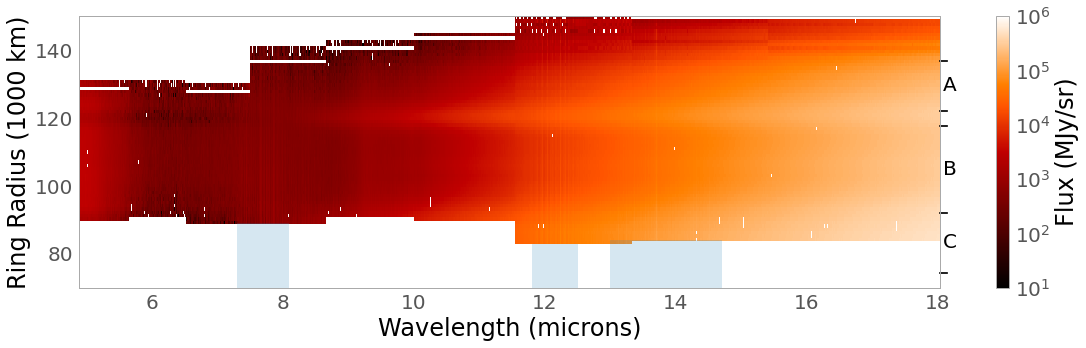

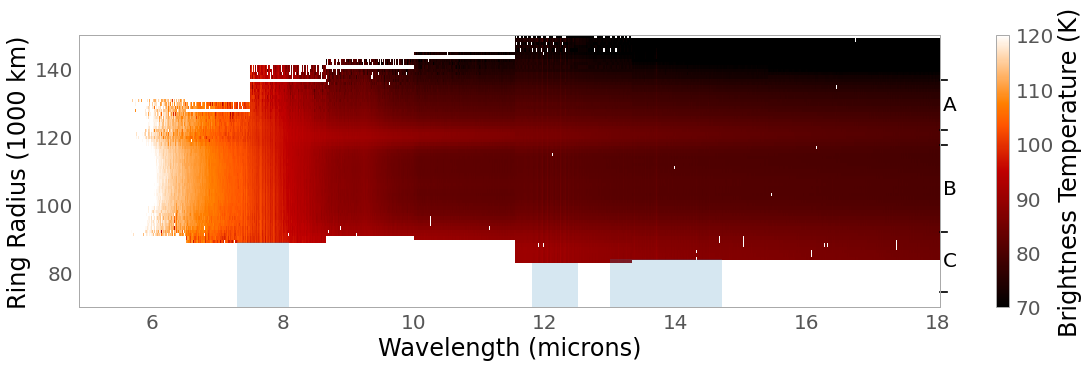

In [10]:
#Generate Figure 12

from matplotlib.colors import LogNorm

plt.rcParams['font.size'] = 20
plt.figure(figsize=[20,5])
plt.imshow(np.transpose(specx), extent=[np.min(wavex),np.max(wavex),70,150], origin='lower', 
           aspect=0.008*(18.03-11.55), norm=LogNorm(vmin=10,vmax=1e6), interpolation='none')

#plt.title('MIRI Channel 3')
plt.colorbar(label='Flux (MJy/sr)')
plt.grid(b=None)
plt.xlabel('Wavelength (microns)')
plt.ylabel('Ring Radius (1000 km)')
plt.axvspan(7.3,8.1,alpha=0.2, ymax=(89-70)/(150-70))
plt.axvspan(11.8,12.5,alpha=0.2, ymax=(83-70)/(150-70))
plt.axvspan(13,14.7,alpha=0.2, ymax=(84-70)/(150-70)) 
markbc=plt.plot(np.array([np.max(wavex),np.max(wavex)+.1]),np.array([91.98,91.98]), 'k')
markbc[0].set_clip_on(False)
markcd=plt.plot(np.array([np.max(wavex),np.max(wavex)+.1]),np.array([74.49,74.49]), 'k')
markcd[0].set_clip_on(False)
markbd=plt.plot(np.array([np.max(wavex),np.max(wavex)+.1]),np.array([117.5,117.5]), 'k')
markbd[0].set_clip_on(False)
markad=plt.plot(np.array([np.max(wavex),np.max(wavex)+.1]),np.array([122.05,122.05]), 'k')
markad[0].set_clip_on(False)
markax=plt.plot(np.array([np.max(wavex),np.max(wavex)+.1]),np.array([136.77,136.77]), 'k')
markax[0].set_clip_on(False)
plt.text(np.max(wavex)+.05,(75+92)/2, 'C', verticalalignment='center')
plt.xlim(np.min(wavex),np.max(wavex))
plt.text(np.max(wavex)+.05,(117.5+92)/2, 'B', verticalalignment='center')
plt.xlim(np.min(wavex),np.max(wavex))
plt.text(np.max(wavex)+.05,(122+137)/2, 'A', verticalalignment='center')
plt.xlim(np.min(wavex),np.max(wavex))
plt.show()
plt.rcParams['font.size'] = 12

plt.rcParams['font.size'] = 20
plt.figure(figsize=[20,5])
plt.imshow(np.transpose(tempx), extent=[np.min(wavex),np.max(wavex),70,150], origin='lower', 
           aspect=0.008*(18.03-11.55), vmin=70, vmax=120, interpolation='none')
#plt.title('MIRI Channel 3')
plt.colorbar(label='Brightness Temperature (K)')
plt.grid(b=None)
plt.xlabel('Wavelength (microns)')
plt.ylabel('Ring Radius (1000 km)')
plt.axvspan(7.3,8.1,alpha=0.2, ymax=(89-70)/(150-70))
plt.axvspan(11.8,12.5,alpha=0.2, ymax=(83-70)/(150-70))
plt.axvspan(13,14.7,alpha=0.2, ymax=(84-70)/(150-70))
markbc=plt.plot(np.array([np.max(wavex),np.max(wavex)+.1]),np.array([91.98,91.98]), 'k')
markbc[0].set_clip_on(False)
markcd=plt.plot(np.array([np.max(wavex),np.max(wavex)+.1]),np.array([74.49,74.49]), 'k')
markcd[0].set_clip_on(False)
markbd=plt.plot(np.array([np.max(wavex),np.max(wavex)+.1]),np.array([117.5,117.5]), 'k')
markbd[0].set_clip_on(False)
markad=plt.plot(np.array([np.max(wavex),np.max(wavex)+.1]),np.array([122.05,122.05]), 'k')
markad[0].set_clip_on(False)
markax=plt.plot(np.array([np.max(wavex),np.max(wavex)+.1]),np.array([136.77,136.77]), 'k')
markax[0].set_clip_on(False)
plt.text(np.max(wavex)+.05,(75+92)/2, 'C', verticalalignment='center')
plt.xlim(np.min(wavex),np.max(wavex))
plt.text(np.max(wavex)+.05,(117.5+92)/2, 'B', verticalalignment='center')
plt.xlim(np.min(wavex),np.max(wavex))
plt.text(np.max(wavex)+.05,(122+137)/2, 'A', verticalalignment='center')
plt.xlim(np.min(wavex),np.max(wavex))
plt.show()
plt.rcParams['font.size'] = 12

In [11]:
rats=np.zeros([8,81])
for i in range(81):
    rats[0,i]=np.nanmean(spec1s[(wave1s>np.min(wave1m)),i])/np.nanmean(spec1m[(wave1m<np.max(wave1s)),i])
    rats[1,i]=np.nanmean(spec1m[(wave1m>np.min(wave1l)),i])/np.nanmean(spec1l[(wave1l<np.max(wave1m)),i])
    rats[2,i]=np.nanmean(spec1l[(wave1l>np.min(wave2s)),i])/np.nanmean(spec2s[(wave2s<np.max(wave1l)),i])
    rats[3,i]=np.nanmean(spec2s[(wave2s>np.min(wave2m)),i])/np.nanmean(spec2m[(wave2m<np.max(wave2s)),i])
    rats[4,i]=np.nanmean(spec2m[(wave2m>np.min(wave2l)),i])/np.nanmean(spec2l[(wave2l<np.max(wave2m)),i])
    rats[5,i]=np.nanmean(spec2l[(wave2l>np.min(wave3s)),i])/np.nanmean(spec3s[(wave3s<np.max(wave2l)),i])
    rats[6,i]=np.nanmean(spec3s[(wave3s>np.min(wave3m)),i])/np.nanmean(spec3m[(wave3m<np.max(wave3s)),i])
    rats[7,i]=np.nanmean(spec3m[(wave3m>np.min(wave3l)),i])/np.nanmean(spec3l[(wave3l<np.max(wave3m)),i])

        

/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/4143948715.py:3: RuntimeWarning: Mean of empty slice
  rats[0,i]=np.nanmean(spec1s[(wave1s>np.min(wave1m)),i])/np.nanmean(spec1m[(wave1m<np.max(wave1s)),i])
/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/4143948715.py:4: RuntimeWarning: Mean of empty slice
  rats[1,i]=np.nanmean(spec1m[(wave1m>np.min(wave1l)),i])/np.nanmean(spec1l[(wave1l<np.max(wave1m)),i])
/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/4143948715.py:5: RuntimeWarning: Mean of empty slice
  rats[2,i]=np.nanmean(spec1l[(wave1l>np.min(wave2s)),i])/np.nanmean(spec2s[(wave2s<np.max(wave1l)),i])
/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/4143948715.py:6: RuntimeWarning: Mean of empty slice
  rats[3,i]=np.nanmean(spec2s[(wave2s>np.min(wave2m)),i])/np.nanmean(spec2m[(wave2m<np.max(wave2s)),i])
/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/4143948715.py:7: RuntimeWarning: Mean of empty 

In [12]:
#Compute scaling factors required to match across spectral channels

rats=np.zeros([8,81])
for i in range(81):
    rats[0,i]=np.nanmean(spec1s[(wave1s>np.min(wave1m)),i])/np.nanmean(spec1m[(wave1m<np.max(wave1s)),i])
    rats[1,i]=np.nanmean(spec1m[(wave1m>np.min(wave1l)),i])/np.nanmean(spec1l[(wave1l<np.max(wave1m)),i])
    rats[2,i]=np.nanmean(spec1l[(wave1l>np.min(wave2s)),i])/np.nanmean(spec2s[(wave2s<np.max(wave1l)),i])
    rats[3,i]=np.nanmean(spec2s[(wave2s>np.min(wave2m)),i])/np.nanmean(spec2m[(wave2m<np.max(wave2s)),i])
    rats[4,i]=np.nanmean(spec2m[(wave2m>np.min(wave2l)),i])/np.nanmean(spec2l[(wave2l<np.max(wave2m)),i])
    rats[5,i]=np.nanmean(spec2l[(wave2l>np.min(wave3s)),i])/np.nanmean(spec3s[(wave3s<np.max(wave2l)),i])
    rats[6,i]=np.nanmean(spec3s[(wave3s>np.min(wave3m)),i])/np.nanmean(spec3m[(wave3m<np.max(wave3s)),i])
    rats[7,i]=np.nanmean(spec3m[(wave3m>np.min(wave3l)),i])/np.nanmean(spec3l[(wave3l<np.max(wave3m)),i])

rfoo=(rad1>100e3) & (rad1<110e3)
ratx=np.zeros([8,81])
ratx[0,:]=rats[0,:]
for i in range(1,8):
    ratx[i,:]=rats[i,:]*ratx[i-1,:]

spec1sn=spec1s-spec1s
spec1mn=spec1m-spec1m
spec1ln=spec1l-spec1l
spec2sn=spec2s-spec2s
spec2mn=spec2m-spec2m
spec2ln=spec2l-spec2l
spec3sn=spec3s-spec3s
spec3mn=spec3m-spec3m
spec3ln=spec3l-spec3l

spec1sn=spec1s+spec1s*0
for i in range(81):
    spec3ln[:,i]=spec3l[:,i]*ratx[7,i]
    spec3mn[:,i]=spec3m[:,i]*ratx[6,i]
    spec3sn[:,i]=spec3s[:,i]*ratx[5,i]
    spec2ln[:,i]=spec2l[:,i]*ratx[4,i]
    spec2mn[:,i]=spec2m[:,i]*ratx[3,i]
    spec2sn[:,i]=spec2s[:,i]*ratx[2,i]
    spec1ln[:,i]=spec1l[:,i]*ratx[1,i]
    spec1mn[:,i]=spec1m[:,i]*ratx[0,i]

/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/4289491509.py:5: RuntimeWarning: Mean of empty slice
  rats[0,i]=np.nanmean(spec1s[(wave1s>np.min(wave1m)),i])/np.nanmean(spec1m[(wave1m<np.max(wave1s)),i])
/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/4289491509.py:6: RuntimeWarning: Mean of empty slice
  rats[1,i]=np.nanmean(spec1m[(wave1m>np.min(wave1l)),i])/np.nanmean(spec1l[(wave1l<np.max(wave1m)),i])
/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/4289491509.py:7: RuntimeWarning: Mean of empty slice
  rats[2,i]=np.nanmean(spec1l[(wave1l>np.min(wave2s)),i])/np.nanmean(spec2s[(wave2s<np.max(wave1l)),i])
/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/4289491509.py:8: RuntimeWarning: Mean of empty slice
  rats[3,i]=np.nanmean(spec2s[(wave2s>np.min(wave2m)),i])/np.nanmean(spec2m[(wave2m<np.max(wave2s)),i])
/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/4289491509.py:9: RuntimeWarning: Mean of empty 

In [13]:
#Fit long-wavelength data to a scaled blackbody

from scipy.optimize import curve_fit
pars=np.zeros([2,81])
for i in range(0,71):
    specx=spec3ln[:,i]
    qq=((wave3l>15) & (wave3l<20) & np.isfinite(specx)) 
    if len(specx[qq])>20:
        popt, pcov = curve_fit(bfunc2, wave3l[qq],specx[qq], bounds=[[0,1],[1,120]])
        pars[0:2,i]=popt

[1.08085143 1.14207468 1.20469512 1.30915554 1.40604516 1.35172798
 1.38596319 1.38721974]
[1.08085143 1.05682362 1.05461547 1.08658147 1.07409974 0.96096386
 1.02546385 1.00085018]
0.662977192700934 86.31004736628427


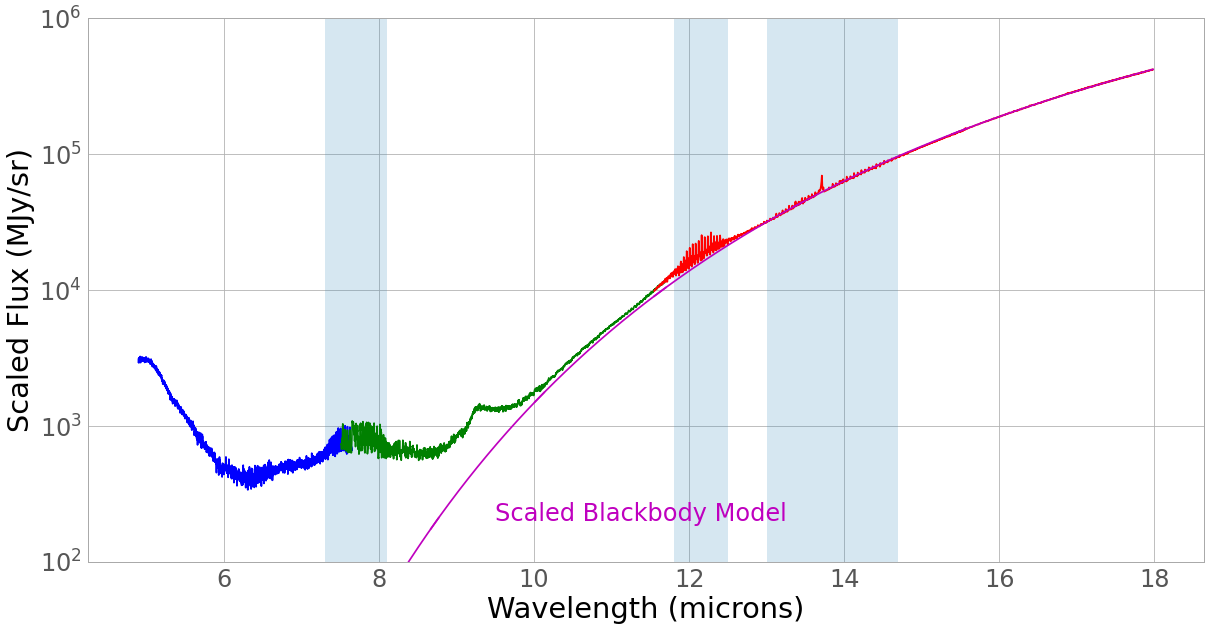

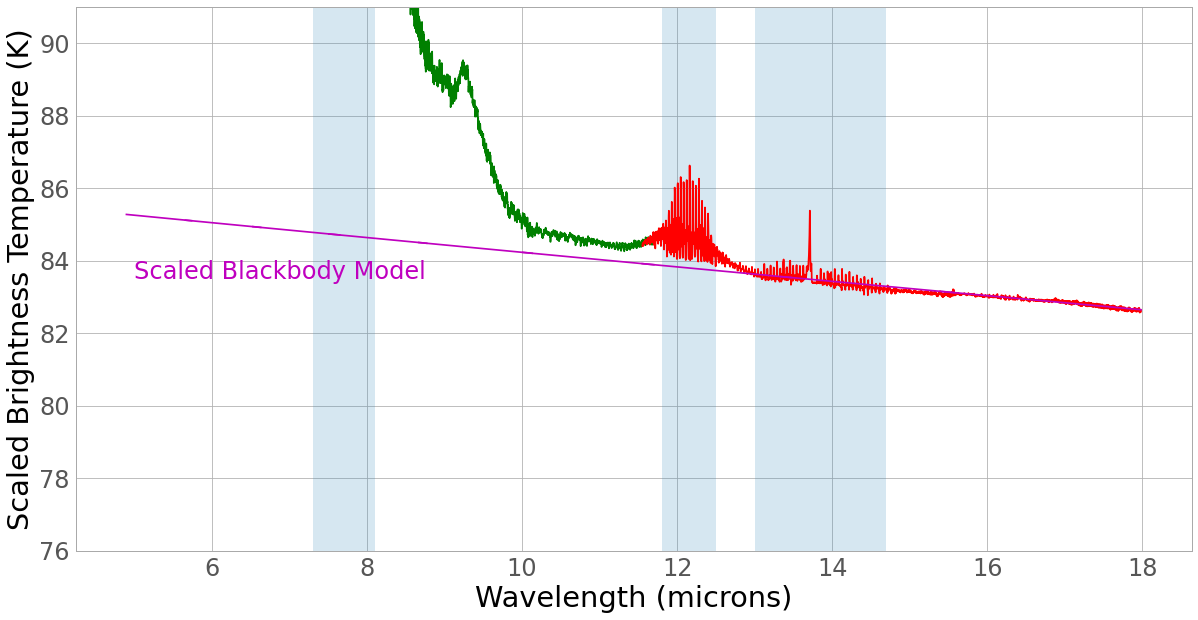

In [14]:
#Generate Figure 13.


print(np.mean(ratx[:,rfoo], axis=1))
print(np.mean(rats[:,rfoo], axis=1))
plt.figure(figsize=[20,10])
plt.rcParams['font.size'] = 24
plt.plot(wave1s,np.nanmean(spec1sn[:,rfoo], axis=1), 'b')
plt.plot(wave1m,np.nanmean(spec1mn[:,rfoo], axis=1), 'b')
plt.plot(wave1l,np.nanmean(spec1ln[:,rfoo], axis=1), 'b')
plt.plot(wave2s,np.nanmean(spec2sn[:,rfoo], axis=1), 'g')
plt.plot(wave2m,np.nanmean(spec2mn[:,rfoo], axis=1), 'g')
plt.plot(wave2l,np.nanmean(spec2ln[:,rfoo], axis=1), 'g')
#plt.plot(wave3s,np.nanmean(spec3s[:,rfoo], axis=1)/np.mean(rat[rfoo]), 'r')
#plt.plot(wave3m,np.nanmean(spec3m[:,rfoo], axis=1)/np.mean(rat[rfoo]), 'r')
#plt.plot(wave3l,np.nanmean(spec3l[:,rfoo], axis=1)/np.mean(rat[rfoo]), 'r')
plt.plot(wave3s,np.nanmean(spec3sn[:,rfoo], axis=1), 'r')
plt.plot(wave3m,np.nanmean(spec3mn[:,rfoo], axis=1), 'r')
plt.plot(wave3l,np.nanmean(spec3ln[:,rfoo], axis=1), 'r')
plt.axvspan(7.3,8.1,alpha=0.2)
plt.axvspan(11.8,12.5,alpha=0.2)
plt.axvspan(13,14.7,alpha=0.2)
print(np.mean(pars[0,rfoo]),np.mean(pars[1,rfoo]))
c=np.mean(pars[0,rfoo])#0.48
t=np.mean(pars[1,rfoo])#86.4
plt.plot(wave3l,bfunc2(wave3l,c,t), 'm')
plt.plot(wave3m,bfunc2(wave3m,c,t), 'm')
plt.plot(wave3s,bfunc2(wave3s,c,t), 'm')
plt.plot(wave2l,bfunc2(wave2l,c,t), 'm')
plt.plot(wave2m,bfunc2(wave2m,c,t), 'm')
plt.plot(wave2s,bfunc2(wave2s,c,t), 'm')
plt.plot(wave1l,bfunc2(wave1l,c,t), 'm')
plt.plot(wave1m,bfunc2(wave1m,c,t), 'm')
plt.plot(wave1s,bfunc2(wave1s,c,t), 'm')
plt.ylim([100,1e6])
plt.text(9.5,200,'Scaled Blackbody Model', color='m')
plt.yscale('log')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scaled Flux (MJy/sr)')
plt.plot()
plt.figure(figsize=[20,10])
plt.plot(wave1s,tempcalc(wave1s,np.nanmean(spec1sn[:,rfoo], axis=1)), 'b')
plt.plot(wave1m,tempcalc(wave1m,np.nanmean(spec1mn[:,rfoo], axis=1)), 'b')
plt.plot(wave1l,tempcalc(wave1l,np.nanmean(spec1ln[:,rfoo], axis=1)), 'b')

plt.plot(wave2s,tempcalc(wave2s,np.nanmean(spec2sn[:,rfoo], axis=1)), 'g')
plt.plot(wave2m,tempcalc(wave2m,np.nanmean(spec2mn[:,rfoo], axis=1)), 'g')
plt.plot(wave2l,tempcalc(wave2l,np.nanmean(spec2ln[:,rfoo], axis=1)), 'g')

#plt.plot(wave3s,tempcalc(wave3s,np.nanmean(spec3s[:,rfoo], axis=1)/np.mean(rat[rfoo])), 'r')
#plt.plot(wave3m,tempcalc(wave3m,np.nanmean(spec3m[:,rfoo], axis=1)/np.mean(rat[rfoo])), 'r')
#plt.plot(wave3l,tempcalc(wave3l,np.nanmean(spec3l[:,rfoo], axis=1)/np.mean(rat[rfoo])), 'r')


plt.plot(wave3s,tempcalc(wave3s,np.nanmean(spec3sn[:,rfoo], axis=1)), 'r')
plt.plot(wave3m,tempcalc(wave3m,np.nanmean(spec3mn[:,rfoo], axis=1)), 'r')
plt.plot(wave3l,tempcalc(wave3l,np.nanmean(spec3ln[:,rfoo], axis=1)), 'r')
plt.plot(wave3l,tempcalc(wave3l,bfunc2(wave3l,c,t)), 'm')
plt.plot(wave3m,tempcalc(wave3m,bfunc2(wave3m,c,t)), 'm')
plt.plot(wave3s,tempcalc(wave3s,bfunc2(wave3s,c,t)), 'm')
plt.plot(wave2l,tempcalc(wave2l,bfunc2(wave2l,c,t)), 'm')
plt.plot(wave2m,tempcalc(wave2m,bfunc2(wave2m,c,t)), 'm')
plt.plot(wave2s,tempcalc(wave2s,bfunc2(wave2s,c,t)), 'm')
plt.plot(wave1l,tempcalc(wave1l,bfunc2(wave1l,c,t)), 'm')
plt.plot(wave1m,tempcalc(wave1m,bfunc2(wave1m,c,t)), 'm')
plt.plot(wave1s,tempcalc(wave1s,bfunc2(wave1s,c,t)), 'm')
plt.text(5,83.5,'Scaled Blackbody Model', color='m')

plt.axvspan(7.3,8.1,alpha=0.2)
plt.axvspan(11.8,12.5,alpha=0.2)
plt.axvspan(13,14.7,alpha=0.2)
plt.ylim([76,91])
plt.xlabel('Wavelength (microns)')
plt.ylabel('Scaled Brightness Temperature (K)')
plt.plot()
plt.rcParams['font.size'] = 12

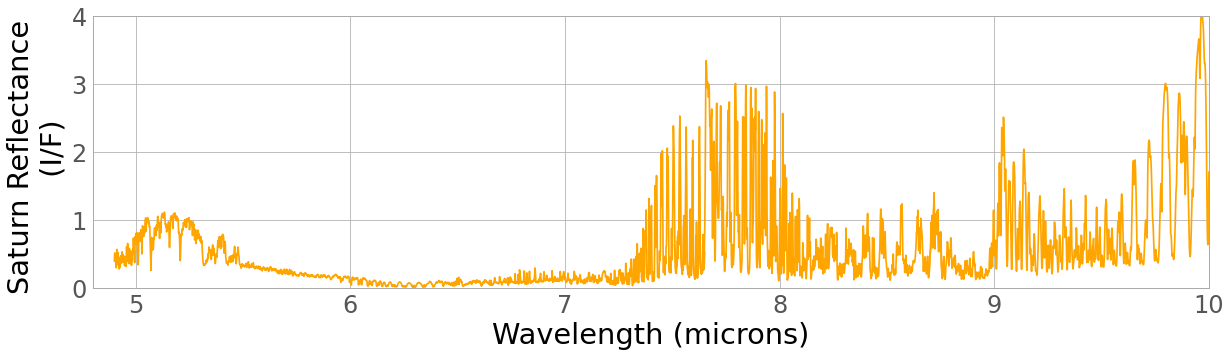

In [15]:
#Generate top panel of Figure 14

plt.figure(figsize=[20,5])
plt.rcParams['font.size'] = 24
rfoo=(rad1>100e3) & (rad1<110e3)

plt.plot(wave1s,spec1sx/fluxfunc(wave1s), 'orange')
plt.plot(wave1m,spec1mx/fluxfunc(wave1m), 'orange')
plt.plot(wave1l,spec1lx/fluxfunc(wave1l), 'orange')
plt.plot(wave2s,spec2sx/fluxfunc(wave2s), 'orange')
plt.plot(wave2m,spec2mx/fluxfunc(wave2m), 'orange')


plt.ylabel('Saturn Reflectance \n (I/F)')
plt.xlabel('Wavelength (microns)')
plt.xlim([4.8,10])
plt.ylim([0,4])
plt.show()


In [16]:
#Generate ring spectra for Figure 14

spec1snr=spec1s-spec1s
spec1mnr=spec1m-spec1m
spec1lnr=spec1l-spec1l
spec2snr=spec2s-spec2s
spec2mnr=spec2m-spec2m
spec2lnr=spec2l-spec2l
spec3snr=spec3s-spec3s
spec3mnr=spec3m-spec3m
spec3lnr=spec3l-spec3l
for i in range(0,81):
    spec1snr[:,i]=spec1sn[:,i]-bfunc2(wave1s,pars[0,i],pars[1,i])
    spec1mnr[:,i]=spec1mn[:,i]-bfunc2(wave1m,pars[0,i],pars[1,i])
    spec1lnr[:,i]=spec1ln[:,i]-bfunc2(wave1l,pars[0,i],pars[1,i])
    spec2snr[:,i]=spec2sn[:,i]-bfunc2(wave2s,pars[0,i],pars[1,i])
    spec2mnr[:,i]=spec2mn[:,i]-bfunc2(wave2m,pars[0,i],pars[1,i])
    spec2lnr[:,i]=spec2ln[:,i]-bfunc2(wave2l,pars[0,i],pars[1,i])
    spec3snr[:,i]=spec3sn[:,i]-bfunc2(wave3s,pars[0,i],pars[1,i])
    spec3mnr[:,i]=spec3mn[:,i]-bfunc2(wave3m,pars[0,i],pars[1,i])
    spec3lnr[:,i]=spec3l[:,i]-bfunc2(wave3l,pars[0,i],pars[1,i])
    
foo1l=(wave1l>7.25)
foo2s=(wave2s<8.15)
satfact=np.zeros(81)
satfact2=np.zeros(81)
satfactx=np.zeros(81)
satfactx2=np.zeros(81)
for i in range(81):
    foo1l=(wave1l>7.25) & np.isfinite(spec1ln[:,i])
    if len(wave1l[foo1l]) > 10:
        a,b=np.polyfit(spec1lx[foo1l],spec1ln[foo1l,i],1)
        satfact[i]=a
        a,b=np.polyfit(spec1lx[foo1l],spec1ln[foo1l,i],1)
        satfactx[i]=a
    foo2s=(wave2s<8.15) & np.isfinite(spec2sn[:,i])
    if len(wave2s[foo2s]) > 10:
        a,b=np.polyfit(spec2sx[foo2s],spec2sn[foo2s,i],1)
        satfact2[i]=a
        a,b=np.polyfit(spec2sx[foo2s],spec2sn[foo2s,i],1)
        satfactx2[i]=a
        

spec1snx=spec1s-spec1s
spec1mnx=spec1m-spec1m
spec1lnx=spec1l-spec1l
spec2snx=spec2s-spec2s
spec2mnx=spec2m-spec2m
spec2lnx=spec2l-spec2l
spec1snxr=spec1s-spec1s
spec1mnxr=spec1m-spec1m
spec1lnxr=spec1l-spec1l
spec2snxr=spec2s-spec2s
spec2mnxr=spec2m-spec2m
spec2lnxr=spec2l-spec2l
for i in range(0,81):
    spec1snx[:,i]=spec1sn[:,i]-spec1sx*satfactx[i]
    spec1mnx[:,i]=spec1mn[:,i]-spec1mx*satfactx[i]
    spec1lnx[:,i]=spec1ln[:,i]-spec1lx*satfactx[i]
    spec2snx[:,i]=spec2sn[:,i]-spec2sx*satfactx2[i]
    spec2mnx[:,i]=spec2mn[:,i]-spec2mx*satfactx2[i]
 #   spec2lnx[:,i]=spec2ln[:,i]-spec2lx*satfactx2[i]
    spec1snxr[:,i]=spec1snx[:,i]-bfunc2(wave1s,pars[0,i],pars[1,i])
    spec1mnxr[:,i]=spec1mnx[:,i]-bfunc2(wave1m,pars[0,i],pars[1,i])
    spec1lnxr[:,i]=spec1lnx[:,i]-bfunc2(wave1l,pars[0,i],pars[1,i])
    spec2snxr[:,i]=spec2snx[:,i]-bfunc2(wave2s,pars[0,i],pars[1,i])
    spec2mnxr[:,i]=spec2mnx[:,i]-bfunc2(wave2m,pars[0,i],pars[1,i])
  #  spec2lnxr[:,i]=spec2lnx[:,i]-bfunc2(wave2l,pars[0,i],pars[1,i])

/var/folders/lj/3p5r7psn5czdlfnyz_18s59h0000gn/T/ipykernel_80420/3184182902.py:28: RuntimeWarning: divide by zero encountered in divide
  bb=c*2*6.63e-34*(nu**3)/3e8/3e8/(np.exp(6.63e-34*nu/1.38e-23/t)-1)*1e20


0.662977192700934
86.31004736628427
0.003311303024794572
0.0034078163801860473


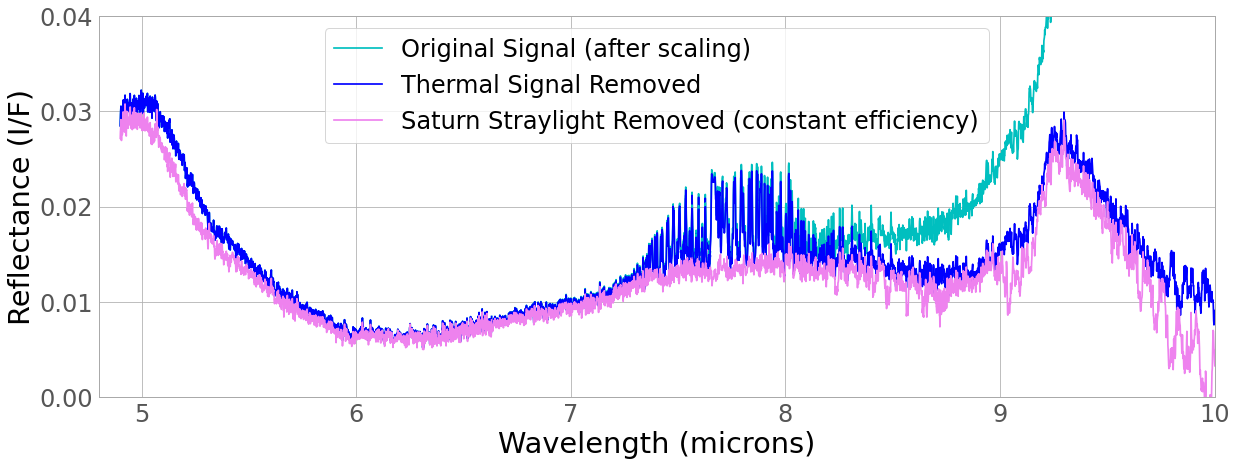

In [17]:
#Generate Middle Panel of Figure 14

plt.figure(figsize=[20,7])
plt.rcParams['font.size'] = 24
rfoo=(rad1>100e3) & (rad1<110e3)
print(np.mean(pars[0,rfoo]))
print(np.mean(pars[1,rfoo]))
print(np.mean(satfactx[rfoo]))
print(np.mean(satfactx2[rfoo]))

plt.plot(wave1s,np.nanmean(spec1sn[:,rfoo], axis=1)/fluxfunc(wave1s), 'c', label='Original Signal (after scaling)')
plt.plot(wave1m,np.nanmean(spec1mn[:,rfoo], axis=1)/fluxfunc(wave1m), 'c')
plt.plot(wave1l,np.nanmean(spec1ln[:,rfoo], axis=1)/fluxfunc(wave1l), 'c')

plt.plot(wave1s,np.nanmean(spec1snr[:,rfoo], axis=1)/fluxfunc(wave1s), 'b', label='Thermal Signal Removed')
plt.plot(wave1m,np.nanmean(spec1mnr[:,rfoo], axis=1)/fluxfunc(wave1m), 'b')
plt.plot(wave1l,np.nanmean(spec1lnr[:,rfoo], axis=1)/fluxfunc(wave1l), 'b')

plt.plot(wave1s,np.nanmean(spec1snxr[:,rfoo], axis=1)/fluxfunc(wave1s), 'violet',label='Saturn Straylight Removed (constant efficiency)')
plt.plot(wave1m,np.nanmean(spec1mnxr[:,rfoo], axis=1)/fluxfunc(wave1m), 'violet')
plt.plot(wave1l,np.nanmean(spec1lnxr[:,rfoo], axis=1)/fluxfunc(wave1l), 'violet')

plt.plot(wave2s,np.nanmean(spec2sn[:,rfoo], axis=1)/fluxfunc(wave2s), 'c')
plt.plot(wave2m,np.nanmean(spec2mn[:,rfoo], axis=1)/fluxfunc(wave2m), 'c')
plt.plot(wave2l,np.nanmean(spec2ln[:,rfoo], axis=1)/fluxfunc(wave2l), 'c')

plt.plot(wave2s,np.nanmean(spec2snr[:,rfoo], axis=1)/fluxfunc(wave2s), 'b')
plt.plot(wave2m,np.nanmean(spec2mnr[:,rfoo], axis=1)/fluxfunc(wave2m), 'b')
#plt.plot(wave2l,np.nanmean(spec2lnr[:,rfoo], axis=1)/fluxfunc(wave2l), 'g')

plt.plot(wave2s,np.nanmean(spec2snxr[:,rfoo], axis=1)/fluxfunc(wave2s), 'violet')
plt.plot(wave2m,np.nanmean(spec2mnxr[:,rfoo], axis=1)/fluxfunc(wave2m), 'violet')
#plt.plot(wave2l,np.nanmean(spec2lnxr[:,rfoo], axis=1)/fluxfunc(wave2l), 'y')

#plt.plot(wave3s,np.nanmean(spec3snr[:,rfoo], axis=1)/fluxfunc(wave3s), 'r')
#plt.plot(wave3m,np.nanmean(spec3mnr[:,rfoo], axis=1)/fluxfunc(wave3m), 'r')
#plt.plot(wave3l,np.nanmean(spec3lnr[:,rfoo], axis=1)/fluxfunc(wave3l), 'r')
plt.ylabel('Reflectance (I/F)')
plt.xlabel('Wavelength (microns)')
plt.legend()
plt.xlim([4.8,10])
plt.ylim([0,.04])
plt.show()

plt.rcParams['font.size'] = 12

In [18]:
#Save B-ring spectrum to csv file

rfoo=(rad1>100e3) & (rad1<110e3)
import csv
with open('JW1247_MIRI_Ringflux.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Wavelength'] + ['Average Ring Flux (MJy/sr)'])
    for i in range(len(wave1s)):
        writer.writerow([wave1s[i]]+[np.nanmean(spec1sn[i,rfoo])])
    for i in range(len(wave1m)):
        writer.writerow([wave1m[i]]+[np.nanmean(spec1mn[i,rfoo])])
    for i in range(len(wave1l)):
        writer.writerow([wave1l[i]]+[np.nanmean(spec1ln[i,rfoo])])
    for i in range(len(wave2s)):
        writer.writerow([wave2s[i]]+[np.nanmean(spec2sn[i,rfoo])])
    for i in range(len(wave2m)):
        writer.writerow([wave2m[i]]+[np.nanmean(spec2mn[i,rfoo])])
    for i in range(len(wave2l)):
        writer.writerow([wave2l[i]]+[np.nanmean(spec2ln[i,rfoo])])
    for i in range(len(wave3s)):
        writer.writerow([wave3s[i]]+[np.nanmean(spec3sn[i,rfoo])])
    for i in range(len(wave3m)):
        writer.writerow([wave3m[i]]+[np.nanmean(spec3mn[i,rfoo])])
    for i in range(len(wave3l)):
        writer.writerow([wave3l[i]]+[np.nanmean(spec3ln[i,rfoo])])